## Lista 7

In [3]:
import numpy as np, matplotlib.pyplot as plt

In [29]:
def gen_xt(n, phi, sigma):
  X = np.zeros(n)
  X[0] = np.random.normal(0, sigma)
  for i in range(1, n):
    noise = np.random.normal(0, sigma)
    X[i] = phi * X[i - 1] + noise
  return X
# x0 = 0
phi = 0.2
sigma = 1
n = 1000
X = gen_xt(n, phi, sigma)

In [9]:
def sampleACVF(X, h):
    n = len(X)
    x_mean = np.mean(X)
    return 1/n*sum((X[i]-x_mean)*(X[i+abs(h)]-x_mean) for i in range(1,n-abs(h)))

In [13]:
def phi_nnw(X):
    return (sum(X[1:]*X[:-1]))/(sum(X[:-1]))**2

def phi_yw(X, gamma):
    return (gamma(X, 0) - 1) / gamma(X, 1)

## zadanie 1

In [4]:
def ar2(n,phi, sigma):
  X = np.zeros(n)
  X[0] = np.random.normal(0, sigma)
  X[1] = np.random.normal(0, sigma)
  for i in range(2, n):
    noise = np.random.normal(0, sigma)
    X[i] = phi[0] * X[i - 1] + phi[1] * X[i-2] + noise
  return X
# x0 = 0
phi = [0.2, 0.3]
sigma = 1
n = 1000
X = ar2(n, phi, sigma)

In [12]:
def gamma1(X, gamma):
    return (gamma(X, 0)*gamma(X, 1) - gamma(X, 1)*gamma(X,2)) / (gamma(X,0)**2 - gamma(X,1)**2)

In [13]:
estymatory = []
for i in range(1000):
    X = ar2(n, phi, sigma)
    est = gamma1(X, sampleACVF)
    estymatory.append(est)    

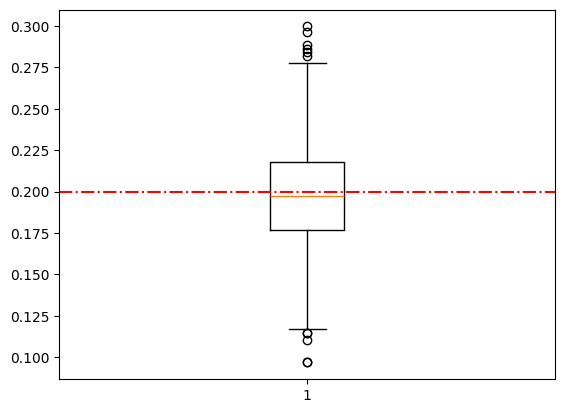

In [14]:
plt.boxplot(estymatory)
plt.axhline(phi[0], color = 'red', ls='-.')

## zadanie 2

In [31]:
nnw = []
yw = []
for i in range(1000):
    X = gen_xt(n, phi, sigma)
    est1 = phi_yw(X, sampleACVF)
    est2 = phi_nnw(X)
    yw.append(est1)  
    nnw.append(est2)

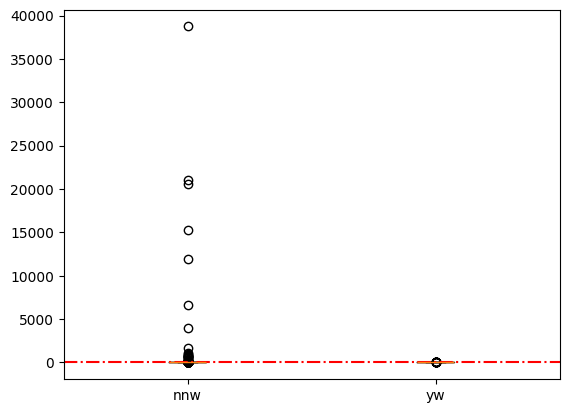

In [32]:
plt.boxplot([nnw, yw], labels = ['nnw', 'yw'])
plt.axhline(phi, color = 'red', ls='-.')

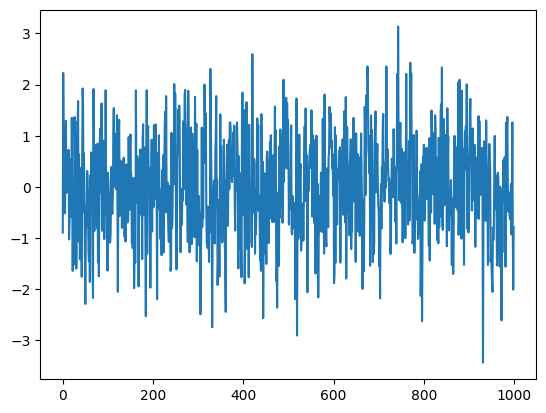

In [33]:
plt.plot(X)